# LİNEER REGRESYON İLE TAHMİN

Bu alıştırmada, modelinizi kullanarak konut fiyatlarını tahmin edeceksiniz.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
import pandas as pd
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**1. Verilerinizi eğitim ve test kümelerine ayırın.**

In [3]:
Y_hp = house_prices_df['SalePrice']
X_hp= house_prices_df[['OverallQual','YearBuilt', '1stFlrSF', 'GrLivArea']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_hp, Y_hp, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


**2. Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.**

In [5]:
X_train1 = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train1).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     891.6
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        13:11:42   Log-Likelihood:                -13994.
No. Observations:                1168   AIC:                         2.800e+04
Df Residuals:                    1163   BIC:                         2.802e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.776e+05    8.9e+04    -10.983      0.000   -1.15e+06   -8.03e+05
OverallQual  2.391e+04   1272.252     18.793      0.000    2.14e+04    2.64e+04
YearBuilt     456.7463     46.962      9.726      0.000     364.607     548.886
1stFlrSF       30.2323      3.673      8.230      0.000      23.025      37.439
GrLivArea      50.4327      3.019     16.704      0.000      44.509      56.356
==============================================================================
Omnibus:                      384.203   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30111.718
Skew:                          -0.570   Prob(JB):                         0.00
Kurtosis:                      27.848   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 ve adj R^2 değerleri %70 in üsütndedir. iyi bir model sayılır.

p değerleri bütün değişkenler için 0 a çok  yakınıdr. İstatistiksel olarak anlamlıdır.

**3. Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.**

In [6]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

y_preds

135    225247.182
1100   -17487.201
833    185206.357
471    227167.566
1123    87547.704
          ...    
1385    78179.199
823    155589.877
466    192577.832
869    230473.851
46     258913.800
Length: 292, dtype: float64

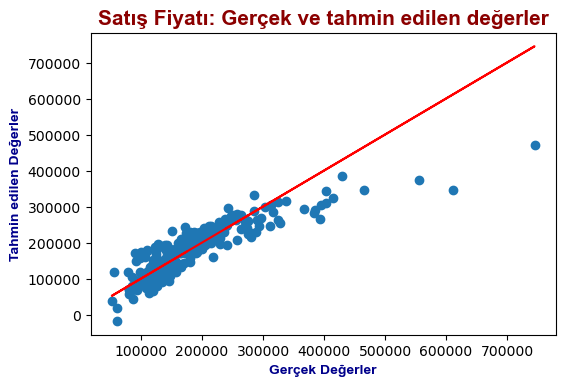

Ortalama Mutlak Hata (MAE)        : 27839.697690699148
Ortalama Kare Hata (MSE)          : 1726136114.207929
Kök Ortalama Kare Hata (RMSE)     : 41546.79427113395
Ortalama Mutlak Yüzde Hata (MAPE) : 16.275065460332495


In [7]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Satış Fiyatı: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Model, hedef değişkenin daha düşük değerlerini yüksek değerlerden daha iyi tahmin etmiştir.

Dört ölçümün tümü için daha düşük değerler istenir. Değer ne kadar düşükse, modelin performansı o kadar iyi olur.

**4. Modelinizin performansı tatmin edici mi? Açıklayın.**

Hedef değişkenin düşük değerleri için tatmin edici ama daha büyük değerler için yetersizdir.



**5. Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.**

In [8]:
house_prices_df['Over_Gr'] = house_prices_df["OverallQual"] * house_prices_df["GrLivArea"]

In [9]:
X_hp2= house_prices_df[['OverallQual','YearBuilt', '1stFlrSF', 'GrLivArea', 'Over_Gr']]

In [10]:
import statsmodels.api as sm

X3_hp = sm.add_constant(X_hp2)
results = sm.OLS(Y_hp, X3_hp).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     990.5
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        13:15:29   Log-Likelihood:                -17461.
No. Observations:                1460   AIC:                         3.493e+04
Df Residuals:                    1454   BIC:                         3.497e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.779e+05   7.88e+04    -11.143      0.000   -1.03e+06   -7.23e+05
OverallQual  7731.3983   1910.867      4.046      0.000    3983.048    1.15e+04
YearBuilt     458.3942     41.269     11.108      0.000     377.441     539.347
1stFlrSF       32.4213      3.220     10.068      0.000      26.105      38.738
GrLivArea     -22.2392      7.509     -2.962      0.003     -36.969      -7.510
Over_Gr        10.7523      1.046     10.278      0.000       8.700      12.804
==============================================================================
Omnibus:                     1141.250   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193270.499
Skew:                          -2.765   Prob(JB):                         0.00
Kurtosis:                      59.093   Cond. No.                     8.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_hp2, Y_hp, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train2.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test2.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [12]:
X_train3 = sm.add_constant(X_train2)

sonuclar = sm.OLS(y_train, X_train3).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     745.1
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        13:15:41   Log-Likelihood:                -13974.
No. Observations:                1168   AIC:                         2.796e+04
Df Residuals:                    1162   BIC:                         2.799e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.069e+05   8.83e+04    -10.275      0.000   -1.08e+06   -7.34e+05
OverallQual  1.275e+04   2164.773      5.888      0.000    8499.575     1.7e+04
YearBuilt     458.8878     46.196      9.933      0.000     368.250     549.525
1stFlrSF       27.8766      3.633      7.674      0.000      20.749      35.004
GrLivArea       0.3863      8.458      0.046      0.964     -16.208      16.980
Over_Gr         7.4267      1.175      6.320      0.000       5.121       9.732
==============================================================================
Omnibus:                      832.805   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104119.062
Skew:                          -2.410   Prob(JB):                         0.00
Kurtosis:                      49.002   Cond. No.                     8.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X_test2 = sm.add_constant(X_test2)

y_preds2 = sonuclar.predict(X_test2)




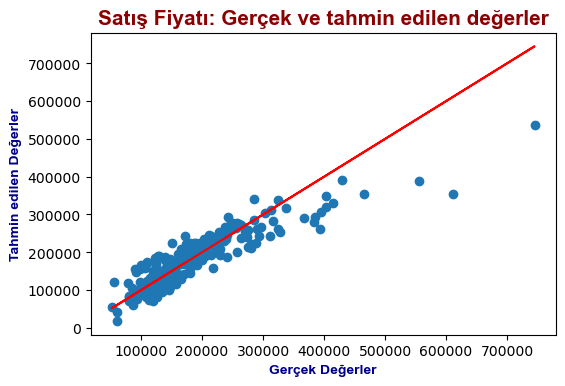

Ortalama Mutlak Hata (MAE)        : 25439.082244198406
Ortalama Kare Hata (MSE)          : 1456988686.1397498
Kök Ortalama Kare Hata (RMSE)     : 38170.521166729566
Ortalama Mutlak Yüzde Hata (MAPE) : 14.39339987031422


In [14]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test2, y_preds2)
plt.plot(y_test2, y_test2, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Satış Fiyatı: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test2, y_preds2)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test2, y_preds2)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test2, y_preds2)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test2 - y_preds2) / y_test2)) * 100))

ilk modelimize göre R^2 değeri artmıştır. 

Ama 4 metrik için hata değerleri düşmüştür.. İyi bir modeldir.

**Over_Gr eklenmemiş ilk modelin metrikleri**

Ortalama Mutlak Hata (MAE)        : 27839.697690699148

Ortalama Kare Hata (MSE)          : 1726136114.207929

Kök Ortalama Kare Hata (RMSE)     : 41546.79427113395

Ortalama Mutlak Yüzde Hata (MAPE) : 16.275065460332495

